In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def entropy(X):
    z = -1 * np.sum([0. if x==0 else x * np.log(x) for x in X])
    z = np.round(z, 2)
    return z

In [45]:
#create candidate distributions
p = {"p1": [1/4, 1/4, 1/4, 1/4],
    "p2": [2/6, 1/6, 1/6, 2/6],
    "p3": [1/6, 2/6, 2/6, 1/6],
    "p4": [1/8, 4/8, 2/8, 1/8]}

In [46]:
#expected value
for key, value in p.items():
    E = np.sum(np.array(value) * np.array([0,1,1,2]))
    print("Expected value of {}: {}".format(key, E))

Expected value of p1: 1.0
Expected value of p2: 1.0
Expected value of p3: 1.0
Expected value of p4: 1.0


In [47]:
# compute entropy
for key, value in p.items():
    ent = entropy(value)
    print("Entropy of {}: {}".format(key, ent))

Entropy of p1: 1.39
Entropy of p2: 1.33
Entropy of p3: 1.33
Entropy of p4: 1.21


In [96]:
# max entropy for a distribution with p = 0.7
p = 0.7
A = [(1-p) ** 2, p * (1-p), (1-p) * p, p ** 2]
entropy(A)

1.22

In [122]:
def sim_p(G=1.4):
    x123 = np.random.uniform(low = 0, high = 1, size = 3)
    x4 = (G * np.sum(x123) - x123[1] - x123[2]) / (2 - G)
    z = np.sum([x123.sum(), x4])
    p = np.hstack([x123,x4]) / z
    var = np.sum((1-p) * p * np.array([0,1,1,2]))
    return {"H": entropy(p), "p": p, "var": var}

In [127]:
N = 10000
sim_H = [sim_p() for n in range(N)]

In [130]:
sim_H[0]["var"]

0.6712298615896957

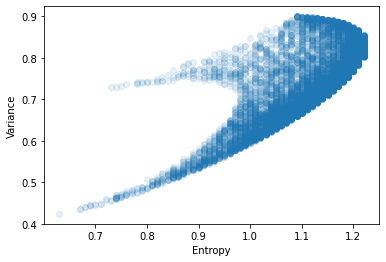

In [137]:
H_ = [i["H"] for i in sim_H]
var_ = [i["var"] for i in sim_H]
plt.scatter(H_, var_, alpha = 0.1)
plt.xlabel("Entropy")
plt.ylabel("Variance")
plt.show()

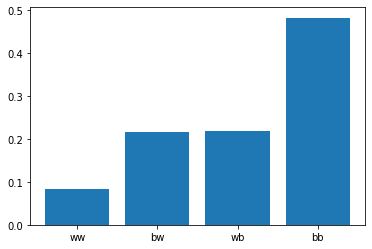

P of distribution with the highest H: [0.08267124 0.21670577 0.21795175 0.48267124]
P of binomial distribution: [0.09000000000000002, 0.21000000000000002, 0.21000000000000002, 0.48999999999999994]


In [136]:
max_H = np.argmax(H_)

plt.bar(["ww", "bw", "wb", "bb"], sim_H[max_H]["p"])
plt.show()

print("P of distribution with the highest H: {}".format(sim_H[max_H]["p"]))
print("P of binomial distribution: {}".format(A))